In [1]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new modelbase
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

### Precriptation Analysis

In [10]:
# Inspect engine
inspector = inspect(engine)

# Print column names of Measurement table
columns = inspector.get_columns('Measurement')

for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Print column names of Station table
columns = inspector.get_columns('Station')

for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Calculate the last data point in the database - 2017-08-23
last_date, = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Convert the string to a date object
last_date = pd.to_datetime(last_date).date()
print(f"Last Date in Database: {last_date}")

Last Date in Database: 2017-08-23


In [13]:
# Calculate the date 1 year ago from the last data point in the database
query_date = last_date - dt.timedelta(days=365)
print(f"Date 1 Year Before Last Date: {query_date}")

Date 1 Year Before Last Date: 2016-08-23


In [14]:
# Perform a query to retrieve the date and precipitation scores for the last 12 months and 
    # order by date
prcp_data = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date > query_date).\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame
prcp_data = pd.DataFrame(data=prcp_data)

# Set the index to the date column
prcp_data = prcp_data.set_index('date')
prcp_data.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


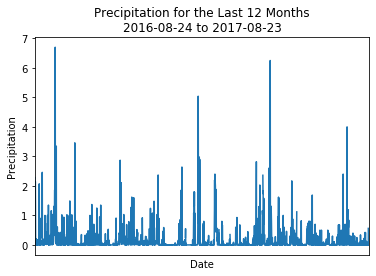

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data as a bar chart
prcp_data.plot(legend=False)
plt.xticks([])
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation for the Last 12 Months\n2016-08-24 to 2017-08-23')
plt.savefig('Precipitation.png')

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [17]:
# Design a query to show how many stations are available in this dataset
num_stations = session.query(Measurement.station).distinct().count()
print(f"Number of Stations: {num_stations}")

Number of Stations: 9


In [18]:
# List the stations and observation counts in descending order
station_counts = session.query(Measurement.station,func.count(Measurement.station).label("observation counts")).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

station_counts = pd.DataFrame(data=station_counts)
station_counts

,station,observation counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
# Calculate the lowest temperature recorded for the most active station (USC00519281)
lowest_temp, = session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f"Lowest Temperature Recorded for the Most Active Station (USC00519281): {lowest_temp[0]} F")

Lowest Temperature Recorded for the Most Active Station (USC00519281): 54.0 F


In [20]:
# Calculate the highest temperature recorded for the most active station (USC00519281)
highest_temp, = session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f"Highest Temperature Recorded for the Most Active Station (USC00519281): {highest_temp[0]} F")

Highest Temperature Recorded for the Most Active Station (USC00519281): 85.0 F


In [21]:
# Calculate the average temperature recorded for the most active station (USC00519281)
avg_temp, = session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(f"Average Temperature Recorded for the Most Active Station (USC00519281): {avg_temp[0]} F")

Average Temperature Recorded for the Most Active Station (USC00519281): 71.66378066378067 F


In [22]:
# Choose the station with the highest number of temperature observations (USC00519281)
# Query the last 12 months of temperature observation data for this station 
tobs_data = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.date > query_date).\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame
tobs_data = pd.DataFrame(data=tobs_data)

# Set the index to the date column
tobs_data = tobs_data.set_index('date')
tobs_data.head()

,tobs
date,
2016-08-24,79.0
2016-08-24,76.0
2016-08-24,80.0
2016-08-24,78.0
2016-08-24,79.0


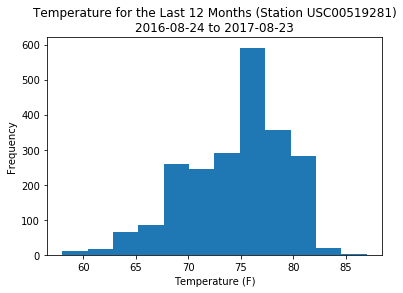

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data as a histogram
tobs_data.plot(kind='hist',bins=12,legend=False)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature for the Last 12 Months (Station USC00519281)\n2016-08-24 to 2017-08-23')
plt.savefig('Temperature.png')

# Optional Challenge Assignment

### Temperature Analysis I

In [24]:
# Calculate the average temperature in June at all stations across all available years in the dataset
avg_temp_june, = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "06").all()
print(f"Average Temperature in June: {avg_temp_june[0]} F")

Average Temperature in June: 74.94411764705882 F


In [25]:
# Calculate the average temperature in December at all stations across all available years in the dataset
avg_temp_dec, = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == "12").all()
print(f"Average Temperature in December: {avg_temp_dec[0]} F")

Average Temperature in December: 71.04152933421226 F


In [26]:
# Save temperature observations in June in a list
temp_june = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06").\
            filter(func.strftime("%Y", Measurement.date) != "2017").\
            filter(func.strftime("%d", Measurement.date) != "31").all()

# Save temperature observations in December in a list
temp_dec = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12").\
            filter(func.strftime("%Y", Measurement.date) != "2017").\
            filter(func.strftime("%d", Measurement.date) != "31").all()

print(f"Number of Observations in June: {len(temp_june)}")
print(f"Number of Observations in December: {len(temp_dec)}")

Number of Observations in June: 1509
Number of Observations in December: 1474


In [27]:
# Save the first 1474 observations in June in a list - to match the same number of December observations
temp_june = temp_june[0:1474] 

print(f"Number of Observations in June: {len(temp_june)}")
print(f"Number of Observations in December: {len(temp_dec)}")

Number of Observations in June: 1474
Number of Observations in December: 1474


In [28]:
# Conduct paired t-test to compare the temperature in June and Dec - will return t-stat and p-value as a tuple
t_stat, p = stats.ttest_rel(temp_june, temp_dec)

# Print summary, statistics, and conclusion
print(f"Average Temperature in June: {avg_temp_june[0]} F")
print(f"Average Temperature in December: {avg_temp_dec[0]} F")
print("")
print(f"t-statistic: {t_stat[0]}")
print(f"p-value: {p[0]}")
print("")
print("The temperature in June is significantly higher than the temperature in December.")

Average Temperature in June: 74.94411764705882 F
Average Temperature in December: 71.04152933421226 F

t-statistic: 31.045038931999144
p-value: 3.2206231337400956e-163

The temperature in June is significantly higher than the temperature in December.


### Temperature Analysis II

In [29]:
# Create function called 'calc_temps' that will accept start date and end date in the format '%Y-%m-%d' 
    # and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs).label("Minimum Temperature"),\
                        func.avg(Measurement.tobs).label("Average Temperature"),\
                        func.max(Measurement.tobs).label("Maximum Temperature")).\
                        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [30]:
# Use the calc_temps function to calculate the min, avg, and max temperatures for your trip 
# Use the matching dates from the previous year - 2017-01-01 to 2017-01-07
trip_temp_data = calc_temps('2017-01-01','2017-01-07')
trip_temp_df = pd.DataFrame(data=trip_temp_data)
trip_temp_df

,Minimum Temperature,Average Temperature,Maximum Temperature
0,62.0,68.365854,74.0


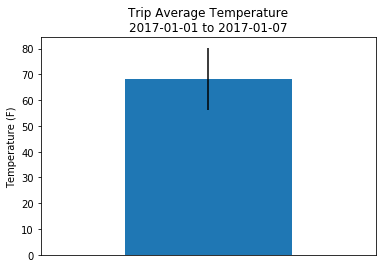

In [31]:
# Plot the min, avg, and max temperature from previous query as a bar chart
# Use the average temperature as the bar height
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
diff_max_min = trip_temp_df.loc[0,'Maximum Temperature']-trip_temp_df.loc[0,'Minimum Temperature']

trip_temp_df.plot(x=None,y='Average Temperature',yerr=diff_max_min,kind='bar',legend=False)
plt.xticks([])
plt.ylabel('Temperature (F)')
plt.title('Trip Average Temperature\n2017-01-01 to 2017-01-07')
plt.savefig('Trip Average Temperature.png')

### Daily Rainfall Average

In [32]:
# Calculate the rainfall per weather station for your trip 
# Use the previous year's matching dates - 2017-01-01 to 2017-01-07
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
avg_rainfall_data = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, \
                    Station.elevation,func.avg(Measurement.prcp).label("average rainfall")).\
                    group_by(Measurement.station).\
                    order_by(func.avg(Measurement.prcp).desc()).\
                    filter(Measurement.station==Station.station).\
                    filter(Measurement.date >= "2017-01-01").filter(Measurement.date <= "2017-01-07").all()
avg_rainfall_df = pd.DataFrame(data=avg_rainfall_data)
avg_rainfall_df

,station,name,latitude,longitude,elevation,average rainfall
0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.152500
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.085714
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.085714
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.050000
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.028571
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.000000


In [33]:
# Create function called 'daily_normals' that will accept date in the format '%m-%d' 
    # and return daily normals (i.e. the averages for tmin, tmax, and tavg 
    # for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs).label("Minimum Temperature"),\
           func.avg(Measurement.tobs).label("Average Temperature"),\
           func.max(Measurement.tobs).label("Maximum Temperature")]
    
    return session.query(*sel).\
        filter(func.strftime("%m-%d", Measurement.date) == date).all()

In [34]:
# Use the start and end date to create a range of dates
# Trip dates = 2017-01-01 to 2017-01-07
trip_dates = pd.date_range('2017-01-01', periods=7, freq='D')

# Stip off the year and save a list of %m-%d strings
trip_dates = trip_dates.strftime('%m-%d').tolist()
print(f"Trip Dates: {trip_dates}")

Trip Dates: ['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07']


In [35]:
# Calculate the daily normals - normals are the averages for the min, avg, and max temperatures
# Create a list of dates for your trip in the format %m-%d
# Use the daily_normals function to calculate the normals for each date string and append the results to a list.
daily_normals_list = []

for date in trip_dates:
    normals, = daily_normals(date)
    daily_normals_list.append(normals) 

# Load the list of daily normals into a Pandas DataFrame
# Add the "trip_dates" range as the "date" index
daily_normals_df = pd.DataFrame(data=daily_normals_list,index=trip_dates)
daily_normals_df.index.name = 'Date'
daily_normals_df

,Minimum Temperature,Average Temperature,Maximum Temperature
Date,,,
01-01,62.0,69.153846,77.0
01-02,60.0,69.396226,77.0
01-03,62.0,68.909091,77.0
01-04,58.0,70.000000,76.0
01-05,56.0,67.964286,76.0
01-06,61.0,68.964912,76.0
01-07,57.0,68.543860,76.0


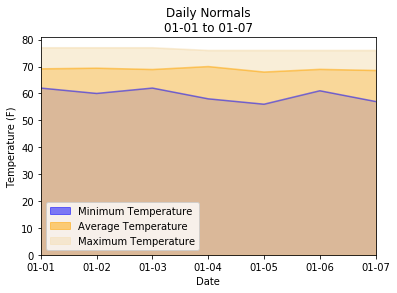

In [36]:
# Use Pandas to plot an area plot (stacked=False) for the daily normals
daily_normals_df.plot(kind="area",stacked=False,color=['blue','orange','wheat'])
plt.ylabel('Date')
plt.ylabel('Temperature (F)')
plt.title('Daily Normals\n01-01 to 01-07')
plt.savefig('Daily Normals')